# TP2: Régression Polynômiale à plusieurs variables

## Importer les librairies

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

## Importer le dataset

In [1]:
try:
    # Read the CSV file
    df = pd.read_csv('land_annual_temperature.csv', sep=';')

    # Check for missing values
    if df.isnull().any().any():
        print("Warning: Dataset contains missing values")
        print("Number of missing values per column:")
        print(df.isnull().sum())
        print("\nRemoving rows with missing values...")
        df = df.dropna()
        print(f"Remaining rows: {len(df)}")

    # Validate numeric data
    for column in df.columns:
        # Convert to numeric, invalid values become NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')

    # Remove any rows that contain NaN after conversion
    initial_len = len(df)
    df = df.dropna()
    if len(df) < initial_len:
        print(f"Removed {initial_len - len(df)} rows with invalid numeric values")

    if len(df) == 0:
        raise ValueError("No valid data remains after cleaning")

except FileNotFoundError:
    raise FileNotFoundError("Error: The file 'land_annual_temperature.csv' was not found. Please check the file path and try again.")
except pd.errors.EmptyDataError:
    raise ValueError("Error: The file is empty.")
except pd.errors.ParserError:
    raise ValueError("Error: Unable to parse the CSV file. Please check the file format and separator.")

NameError: name 'pd' is not defined

In [159]:
print("Aperçu du dataset:")
print(df.head())
print("\nInformations sur le dataset:")
df.info()

Aperçu du dataset:
   Year  land annual temperature
0  1880                    -0.62
1  1881                    -0.41
2  1882                    -0.50
3  1883                    -0.59
4  1884                    -0.86

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     139 non-null    int64  
 1   land annual temperature  139 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


### Renommer les colonnes pour une manipulation plus facile

In [160]:
df.columns = ['Year', 'Temperature']

### S'assurer que les types de données sont corrects

In [161]:
df['Year'] = pd.to_numeric(df['Year'])
df['Temperature'] = pd.to_numeric(df['Temperature'])

### Visualiser les données

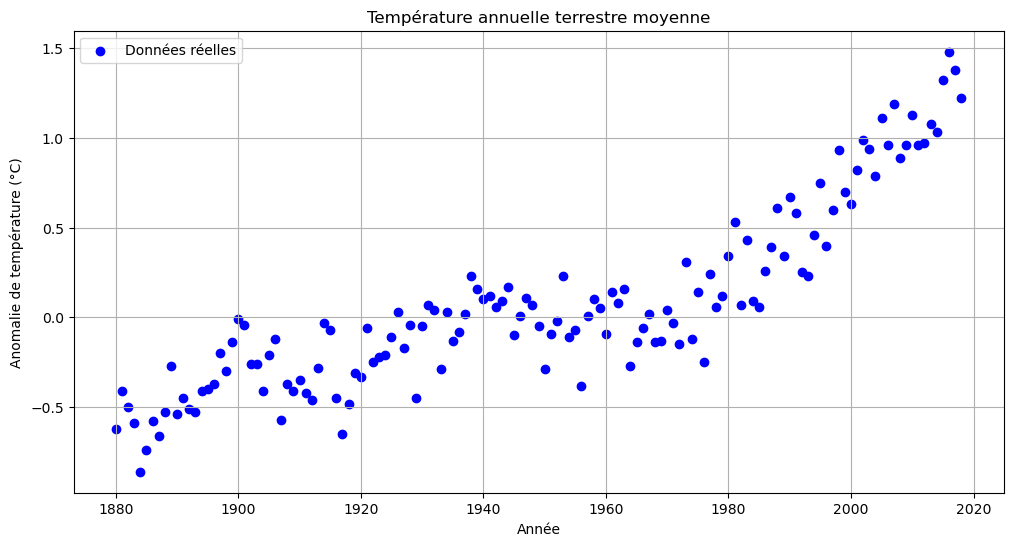

In [162]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Temperature'], color='blue', label='Données réelles')
plt.title('Température annuelle terrestre moyenne')
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.legend()
plt.grid(True)
plt.show()

### Préparer les données pour Scikit-learn

In [163]:
#X doit être un array 2D, y un array 1D
X = df[['Year']]
y = df['Temperature']

## Régression Linéaire Simple

### Implémenter la régression linéaire et Calculer le coefficient de détermination R2

In [164]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

### Prédictions

In [165]:
y_pred_linear = linear_regressor.predict(X)

### Coefficient de détermination R2

In [166]:
r2_linear = r2_score(y, y_pred_linear)

In [167]:
print(f"Coefficient de détermination R² (Régression Linéaire): {r2_linear:.4f}")

Coefficient de détermination R² (Régression Linéaire): 0.7612


### Implémenter la régression polynomiale à plusieurs variables avec le degré 3 et Calculer le coefficient de détermination R²

In [168]:
poly_features = PolynomialFeatures(degree=3, include_bias=False) # include_bias=False car LinearRegression s'en charge
X_poly = poly_features.fit_transform(X)

Entraîner le modèle de régression linéaire sur les features polynomiales

In [169]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)

LinearRegression()

Prédictions

In [170]:
y_pred_poly = poly_regressor.predict(X_poly)

Coefficient de détermination R2

In [171]:
r2_poly = r2_score(y, y_pred_poly)

In [172]:
print(f"Coefficient de détermination R² (Régression Polynomiale degré 3): {r2_poly:.4f}")

Coefficient de détermination R² (Régression Polynomiale degré 3): 0.8836


## Comparer les deux coefficients de détermination.

In [173]:
print("\n--- Comparaison des R² ---")
print(f"R² Linéaire: {r2_linear:.4f}")
print(f"R² Polynomial (degré 3): {r2_poly:.4f}")


--- Comparaison des R² ---
R² Linéaire: 0.7612
R² Polynomial (degré 3): 0.8836


In [174]:
if r2_poly > r2_linear:
    print("Constatation: Le modèle de régression polynomiale (degré 3) a un coefficient R² plus élevé.")
    print("Cela signifie qu'il explique une plus grande proportion de la variance des données de température que le modèle linéaire simple.")
    print("Visuellement, la courbe polynomiale devrait mieux épouser la forme des données.")
else:
    print("Constatation: Le modèle linéaire a un R² comparable ou meilleur, ce qui pourrait indiquer que la complexité ajoutée par le modèle polynomial n'est pas justifiée ou que le degré choisi n'est pas optimal.")


Constatation: Le modèle de régression polynomiale (degré 3) a un coefficient R² plus élevé.
Cela signifie qu'il explique une plus grande proportion de la variance des données de température que le modèle linéaire simple.
Visuellement, la courbe polynomiale devrait mieux épouser la forme des données.


## Donnez une prédiction température annuelle pour l'année 2021.

In [175]:
year_to_predict = 2021
# Reshape and create a DataFrame with the same column name as training data
year_array = pd.DataFrame([[year_to_predict]], columns=['Year'])

### Prédiction avec le modèle linéaire

In [176]:
temp_pred_linear_2021 = linear_regressor.predict(year_array)
print(f"\nPrédiction de température pour {year_to_predict} (Linéaire): {temp_pred_linear_2021[0]:.2f}°C")


Prédiction de température pour 2021 (Linéaire): 0.86°C


C:\Users\FERRA\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Prédiction avec le modèle polynomial

In [177]:
year_poly_features = poly_features.transform(year_array)
temp_pred_poly_2021 = poly_regressor.predict(year_poly_features)
print(f"Prédiction de température pour {year_to_predict} (Polynomial degré 3): {temp_pred_poly_2021[0]:.2f}°C")


Prédiction de température pour 2021 (Polynomial degré 3): 1.57°C


C:\Users\FERRA\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### Visualiser les résultats.

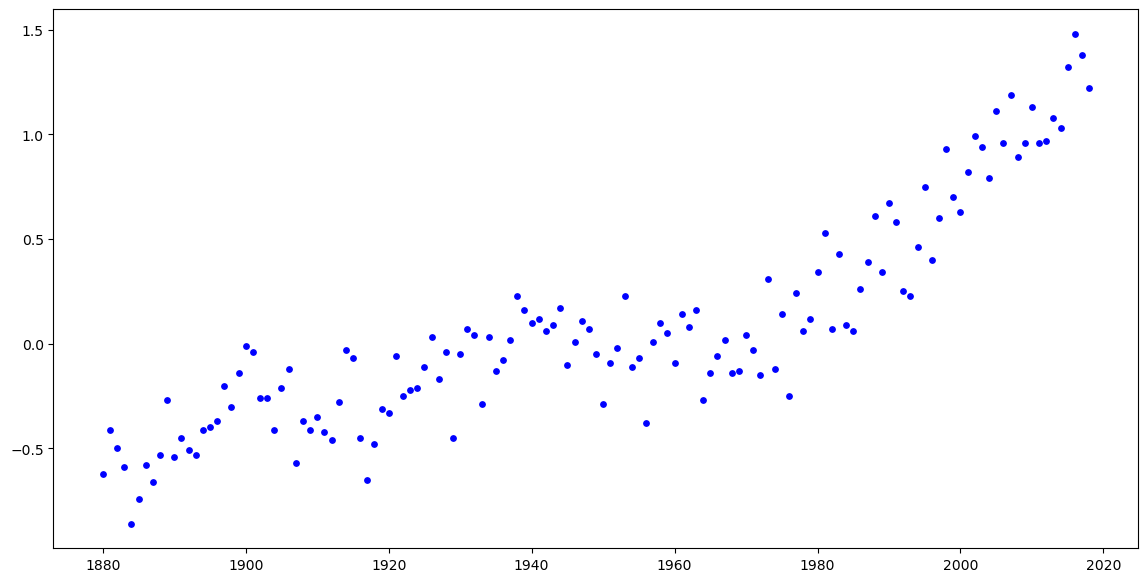

In [178]:
plt.figure(figsize=(14, 7))
plt.scatter(df['Year'], df['Temperature'], color='blue', label='Données réelles', s=15)

In [179]:
X_plot = np.arange(df['Year'].min(), df['Year'].max() + 1).reshape(-1, 1)

C:\Users\FERRA\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


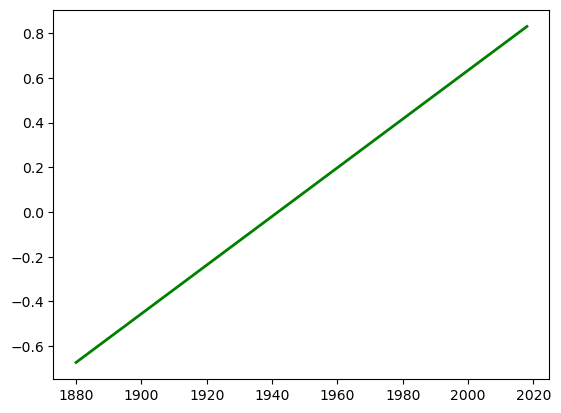

In [180]:
plt.plot(X_plot, linear_regressor.predict(X_plot), color='green', linewidth=2, label=f'Régression Linéaire (R²={r2_linear:.3f})')

C:\Users\FERRA\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


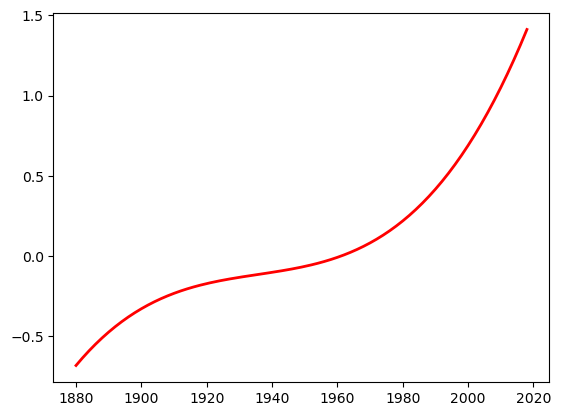

In [181]:
X_plot_poly = poly_features.transform(X_plot)
plt.plot(X_plot, poly_regressor.predict(X_plot_poly), color='red', linewidth=2, label=f'Régression Polynomiale deg 3 (R²={r2_poly:.3f})')


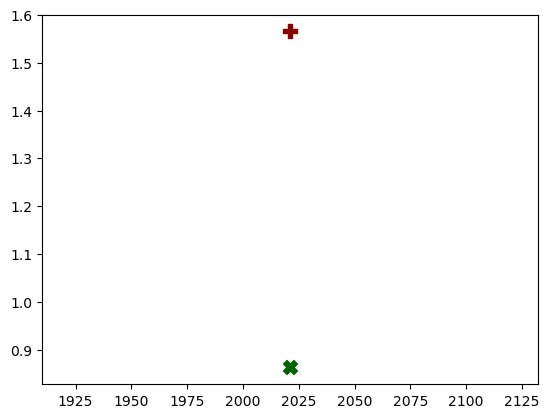

In [182]:
plt.scatter([year_to_predict], [temp_pred_linear_2021], color='darkgreen', marker='X', s=100, label=f'Prédiction 2021 (Lin): {temp_pred_linear_2021[0]:.2f}°C', zorder=5)
plt.scatter([year_to_predict], [temp_pred_poly_2021], color='darkred', marker='P', s=100, label=f'Prédiction 2021 (Poly): {temp_pred_poly_2021[0]:.2f}°C', zorder=5)

C:\Users\FERRA\AppData\Local\Temp\ipykernel_23620\2532573069.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


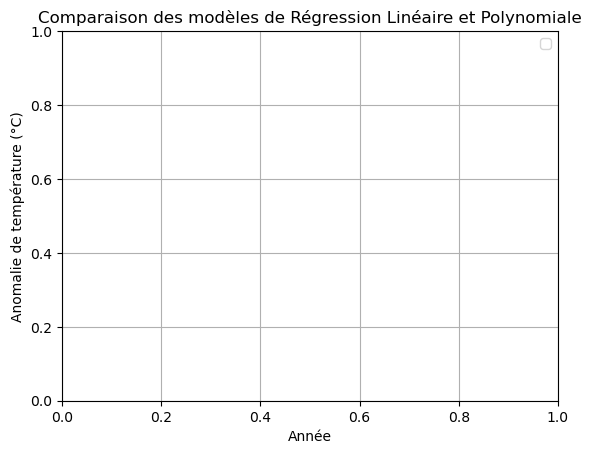

In [183]:
plt.title('Comparaison des modèles de Régression Linéaire et Polynomiale')
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.legend()
plt.grid(True)
plt.show()